In [1]:
from matplotlib.ticker import FuncFormatter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Check any Null value

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEB      96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [19]:
df

,Country,Year,LEB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


edit columns titles 


In [5]:
df.rename(columns={'Life expectancy at birth (years)': 'LEB'}, inplace=True)
df.replace('United States of America', 'USA', inplace=True)
# Create a list of countries
countries = df['Country'].unique().tolist()

colors = ["#FF6F61",  # Coral Red
          "#6B5B95",  # Deep Purple
          "#88B04B",  # Olive Green
          "#F7CAC9",  # Soft Pink
          "#92A8D1",  # Cool Blue
          "#955251"]  # Warm Brown
custom_palette = dict([(country, color) for country, color in zip(countries, colors)])

print(df.dtypes)
print(custom_palette)

Country     object
Year         int64
LEB        float64
GDP        float64
dtype: object
{'Chile': '#FF6F61', 'China': '#6B5B95', 'Germany': '#88B04B', 'Mexico': '#F7CAC9', 'USA': '#92A8D1', 'Zimbabwe': '#955251'}


In [21]:
df.describe()


,Year,LEB,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [20]:
df.Country.value_counts()

Country
Chile       16
China       16
Germany     16
Mexico      16
USA         16
Zimbabwe    16
Name: count, dtype: int64

Individual Scatter Plots

In [7]:
def format_trillions(x, _):
    if x >= 1e12:
        return f'{x / 1e12:.1f}'   # Show trillions
    elif x >= 1e9:
        return f'{x / 1e12:.3f}'    # Show billions
    elif x >= 1e6:
        return f'{x / 1e12:.5f}'    # Show millions
    else:
        return f'{x:.0f}'           # Raw number

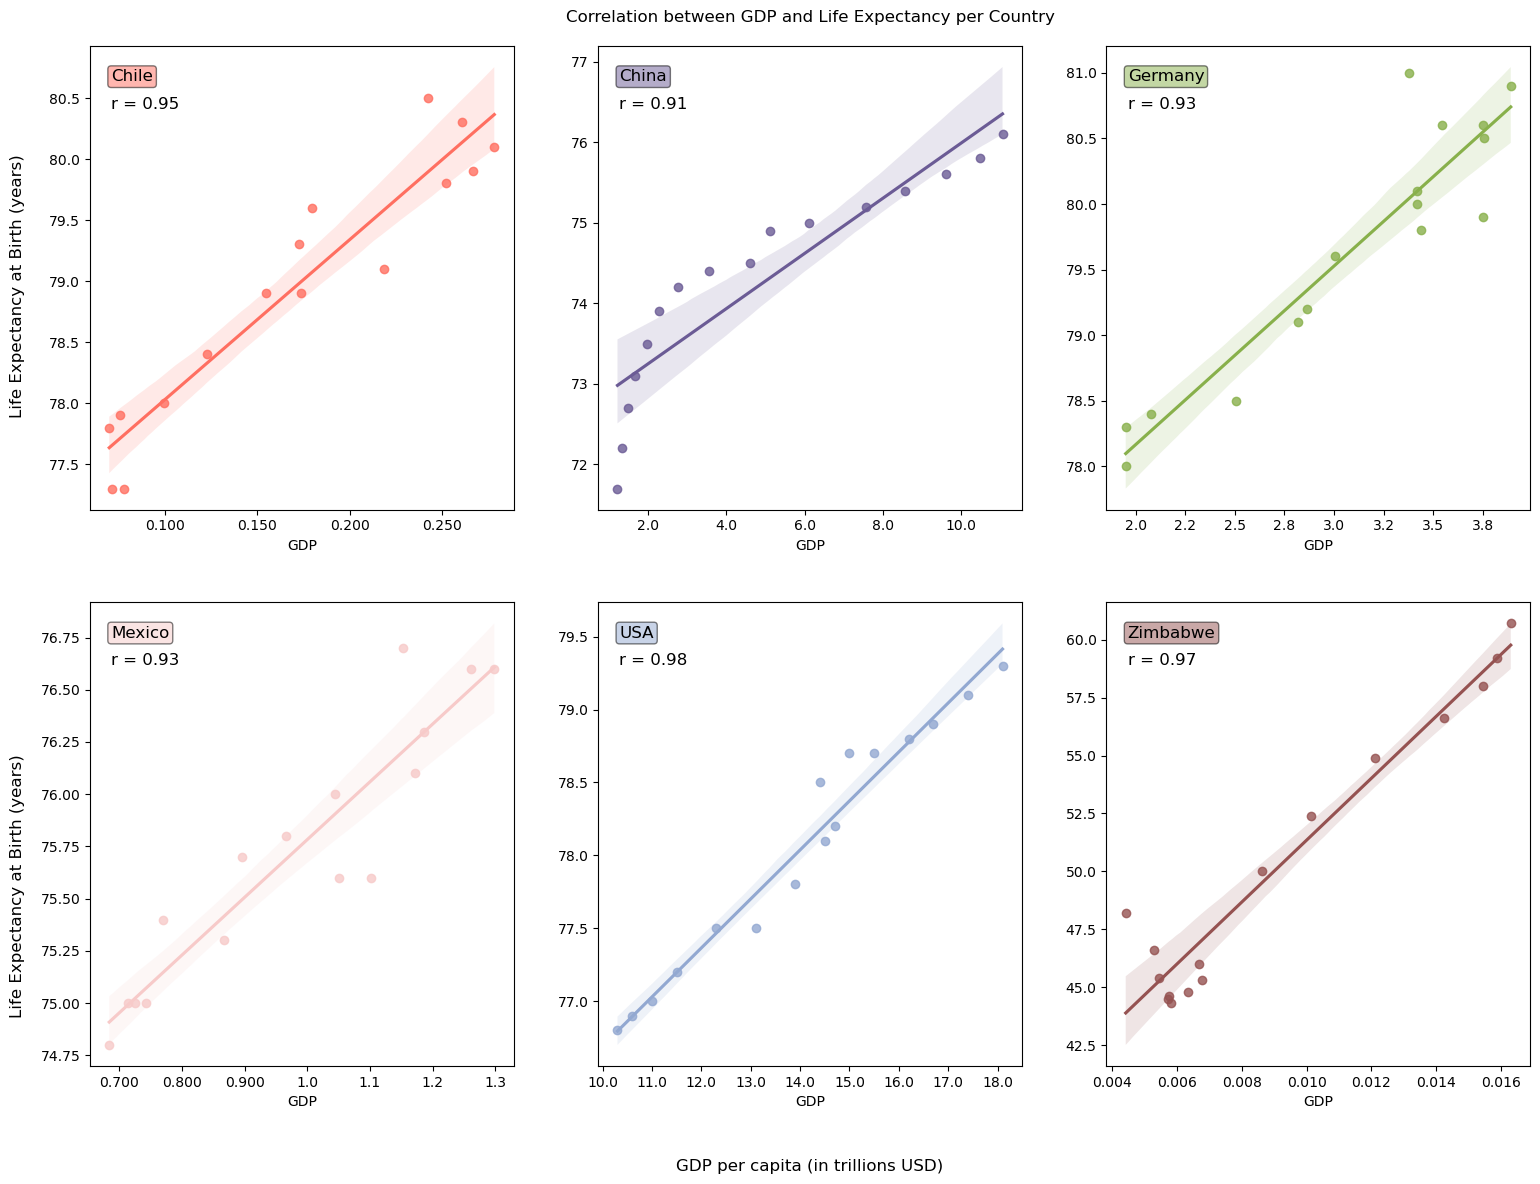

<Figure size 640x480 with 0 Axes>

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
ax = ax.flatten()

for i, country in enumerate(countries):
    data = df[df["Country"] == country]
    sns.regplot(x="GDP", y="LEB", data=data, ax=ax[i], color=custom_palette[country])

    ax[i].xaxis.set_major_formatter(FuncFormatter(format_trillions))
    ax[i].set_ylabel("")

    ax[i].text(
        0.05, 0.95, country,
        transform=ax[i].transAxes,
        fontsize=12,
        fontweight='normal',
        color="black",
        va='top',
        ha='left',
        bbox=dict(
            facecolor=custom_palette[country],
            edgecolor='black',
            boxstyle='round,pad=0.2',
            alpha=0.5
        )
    )

    # Add correlation coefficient
    r = data["GDP"].corr(data["LEB"]).round(2)
    r_str = "r = " + str(r)
    ax[i].text(
        0.05, 0.89, r_str,
        transform=ax[i].transAxes,
        fontsize=12,
        fontweight='normal',
        color="black",
        va='top',
        ha='left'
    )

# Titles and spacing
fig.supxlabel("GDP per capita (in trillions USD)", fontsize=12)

# Y-axis titles for rows
fig.text(0, 0.75, "Life Expectancy at Birth (years)", va='center',
         rotation='vertical', fontsize=12)
fig.text(0, 0.25, "Life Expectancy at Birth (years)", va='center',
         rotation='vertical', fontsize=12)

fig.suptitle('Correlation between GDP and Life Expectancy per Country')

# Adjust spacing
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.10)

# Save first, then show
plt.savefig("correlation-gdp-leb.png", dpi=300)
plt.show()
plt.clf()


Individual Line Charts

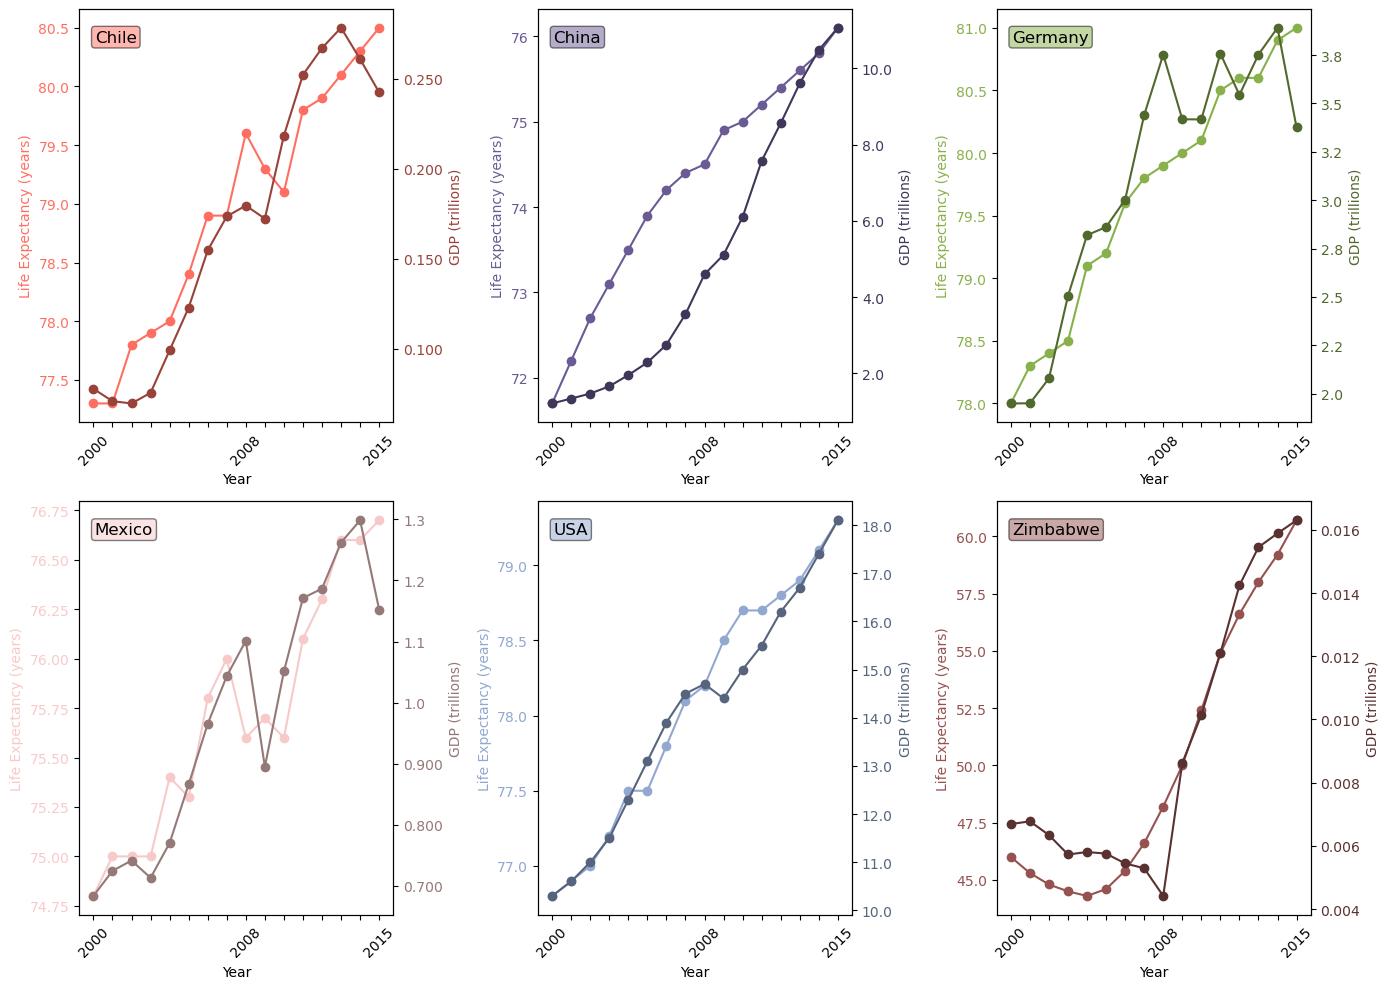

<Figure size 640x480 with 0 Axes>

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
ax = ax.flatten()

for i, country in enumerate(countries):
    data = df[df["Country"] == country]
    ax1 = ax[i]

    # Plot Life Expectancy on left Y-axis
    ax1.plot(data["Year"], data["LEB"], color=custom_palette[country], marker="o", label="LEB")
    ax1.set_ylabel("Life Expectancy (years)", color=custom_palette[country])
    ax1.tick_params(axis='y', labelcolor=custom_palette[country])

    # Right Y-axis for GDP
    ax2 = ax1.twinx()
    ax2_color = darken_color(custom_palette[country], amount=0.4)
    ax2.plot(data["Year"], data["GDP"], color=ax2_color, marker="o")
    ax2.set_ylabel("GDP (trillions)", color=ax2_color)
    ax2.tick_params(axis='y', labelcolor=ax2_color)
    ax2.yaxis.set_major_formatter(FuncFormatter(format_trillions))

    # Format X-axis ticks & labels on ax1
    all_xticks = data["Year"].unique()
    label_years = [2000, 2008, 2015]
    ax1.set_xticks(all_xticks)
    ax1.set_xticklabels([str(x) if x in label_years else "" for x in all_xticks], rotation=45)
    ax1.set_xlabel("Year")

    # Add country name label inside plot
    ax1.text(
        0.05, 0.95, country,
        transform=ax1.transAxes,
        fontsize=12,
        fontweight='normal',
        color="black",
        va='top',
        ha='left',
        bbox=dict(
            facecolor=custom_palette[country],
            edgecolor='black',
            boxstyle='round,pad=0.2',
            alpha=0.5
        )
    )


fig.tight_layout()
plt.savefig("Individual-Line-Charts.png", dpi=300)
plt.show()
plt.clf()


GDP Group Comparison

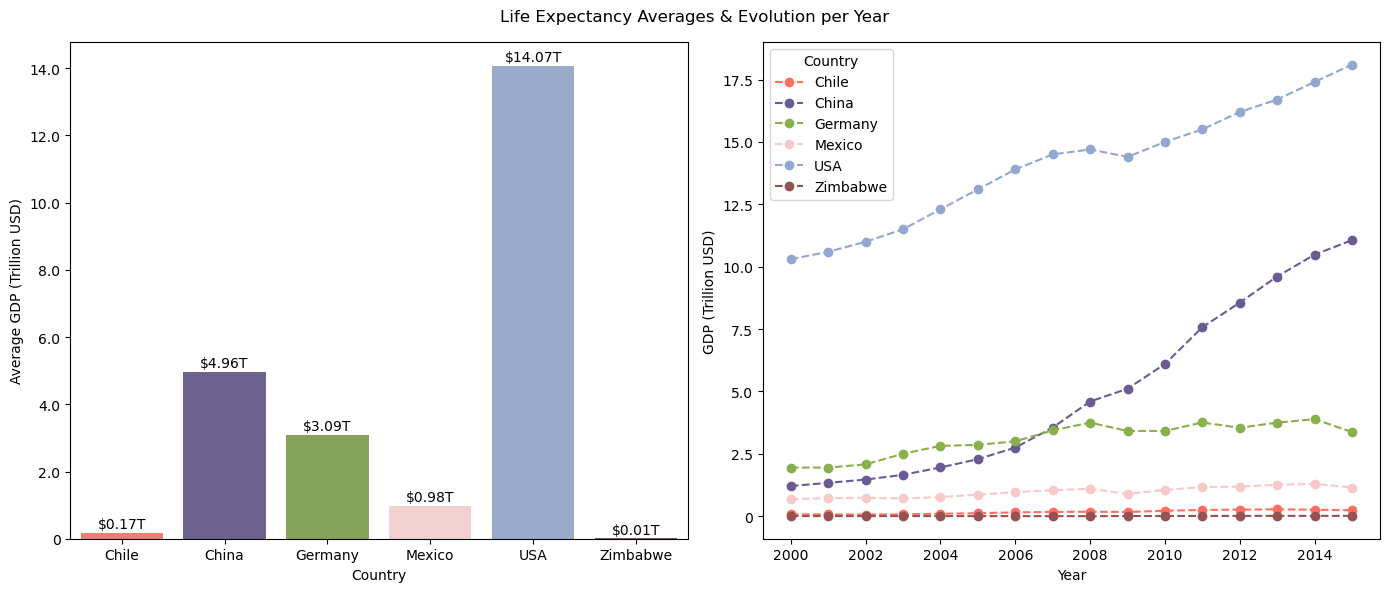

<Figure size 640x480 with 0 Axes>

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Barplot average GDP per country
sns.barplot(
    data=df,
    x="Country",
    hue="Country",
    y="GDP",
    palette=custom_palette,
    dodge=False,
    errorbar=None,
    ax=ax[0]
)

# Remove legend from barplot
if ax[0].get_legend() is not None:
    ax[0].legend_.remove()

ax[0].set_ylabel('Average GDP (Trillion USD)')
ax[0].yaxis.set_major_formatter(FuncFormatter(format_trillions))

# Add labels on top of bars
for bar in ax[0].patches:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5e11,  # adjusted offset, you can tweak this
        f'${height/1e12:.2f}T',
        ha='center',
        va='bottom'
    )

# Evolution of GDP per year by country
for country in countries:
    temp = df[df["Country"] == country]
    ax[1].plot(temp["Year"], temp["GDP"], linestyle="--", marker="o",
               color=custom_palette[country], label=country)

ax[1].yaxis.set_major_formatter(FuncFormatter(format_trillions))
ax[1].set_xlabel("Year")
ax[1].set_ylabel("GDP (Trillion USD)")
ax[1].legend(title="Country")

fig.suptitle("Life Expectancy Averages & Evolution per Year")
plt.tight_layout()
plt.savefig("GDP-Group-Comparison.png")
plt.show()
plt.clf()


What is the average life expectancy in these nations?  //•	Has life expectancy increased over time in the six nations?
#Life Expectancy Group Comparison

Life Expectancy Group Comparison

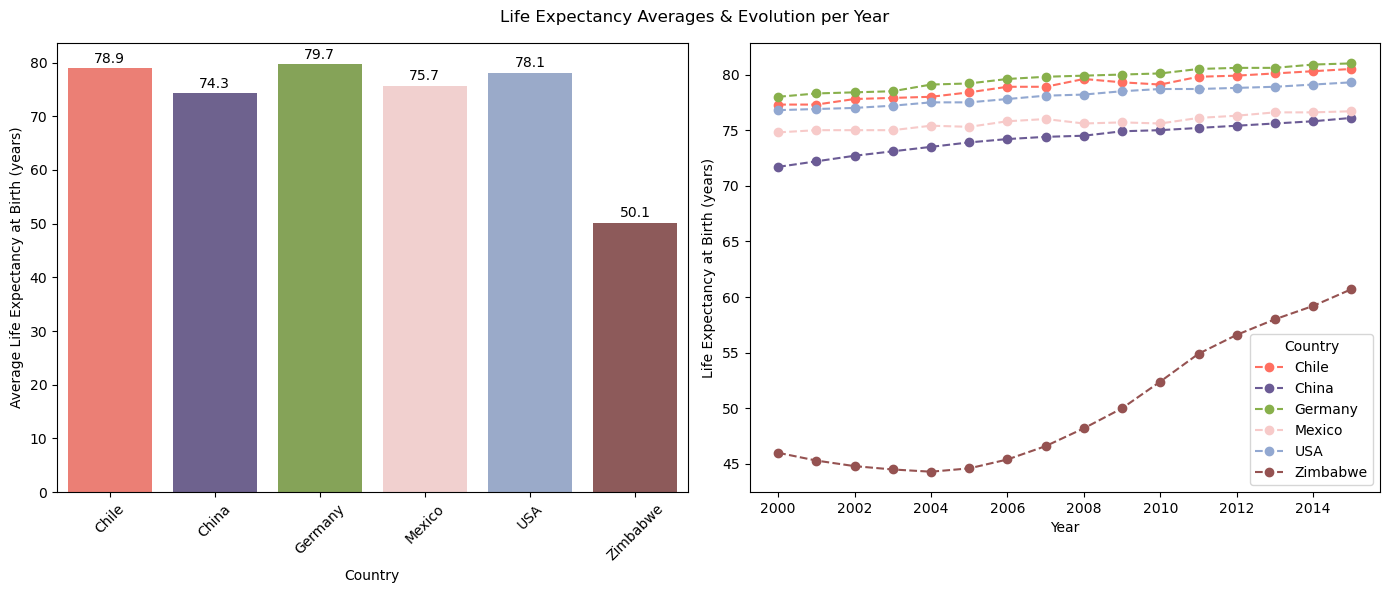

<Figure size 640x480 with 0 Axes>

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Barplot: Average Life Expectancy by Country
sns.barplot(
    data=df,
    x="Country",
    hue="Country",
    y="LEB",
    palette=custom_palette,
    dodge=False,
    errorbar=None,
    ax=ax[0]
)

# Remove legend from barplot
if ax[0].get_legend() is not None:
    ax[0].legend_.remove()

ax[0].set_ylabel("Average Life Expectancy at Birth (years)")
ax[0].tick_params(axis='x', rotation=45)

# Add value labels on top of bars
for bar in ax[0].patches:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}',
        ha='center',
        va='bottom'
    )

# Line plot: Life Expectancy evolution over years per country
for country in countries:
    temp = df[df["Country"] == country]
    ax[1].plot(
        temp["Year"],
        temp["LEB"],
        linestyle="--",
        marker="o",
        color=custom_palette[country],
        label=country
    )

ax[1].set_xlabel("Year")
ax[1].set_ylabel("Life Expectancy at Birth (years)")
ax[1].legend(title="Country")

fig.suptitle("Life Expectancy Averages & Evolution per Year")
plt.tight_layout()
plt.savefig("LEB-Group-Comparison.png")
plt.show()
plt.clf()


Conjugated Box Plots

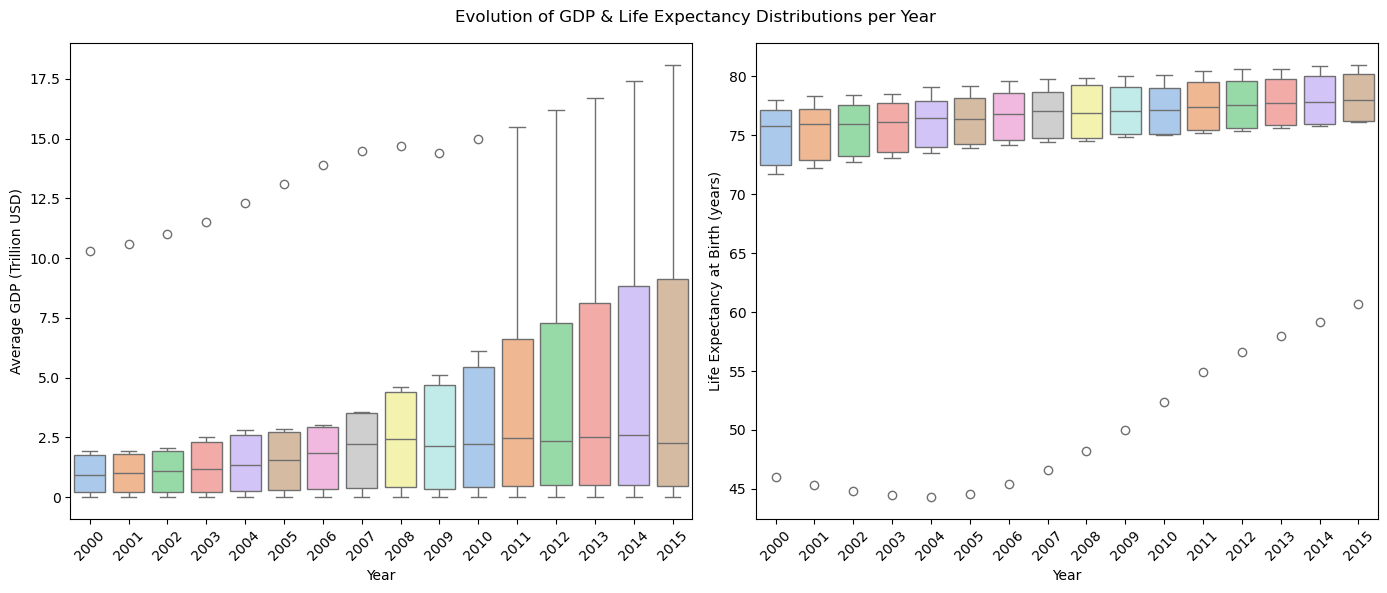

<Figure size 640x480 with 0 Axes>

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.boxplot(data=df, x="Year", y="GDP", hue="Year", palette='pastel', ax=ax[0] , legend=False)
ax[0].set_ylabel('Average GDP (Trillion USD)')
ax[0].yaxis.set_major_formatter(FuncFormatter(format_trillions))
ax[0].tick_params(axis='x', rotation=45)


sns.boxplot(data=df, x="Year", y="LEB", hue="Year", palette='pastel', ax=ax[1])
ax[1].set_ylabel('Life Expectancy at Birth (years)')
ax[1].tick_params(axis='x', rotation=45)
if ax[1].get_legend() is not None:
    ax[1].legend_.remove()

fig.suptitle("Evolution of GDP & Life Expectancy Distributions per Year")
plt.tight_layout()
plt.savefig("combine-boxplot.png")
plt.show()
plt.clf()


In [16]:
df_growth = (
    df.sort_values(by='Year')
      .groupby("Country")
      .agg(
          gdp_growth=('GDP', lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]),
          leb_growth=('LEB', lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0])
      )
)

display(df_growth)

,gdp_growth,leb_growth
Country,,
Chile,2.114758,0.041397
China,8.134189,0.061367
Germany,0.731126,0.038462
Mexico,0.685458,0.025401
USA,0.757282,0.032552
Zimbabwe,1.437186,0.319565


Plot it together for comparison

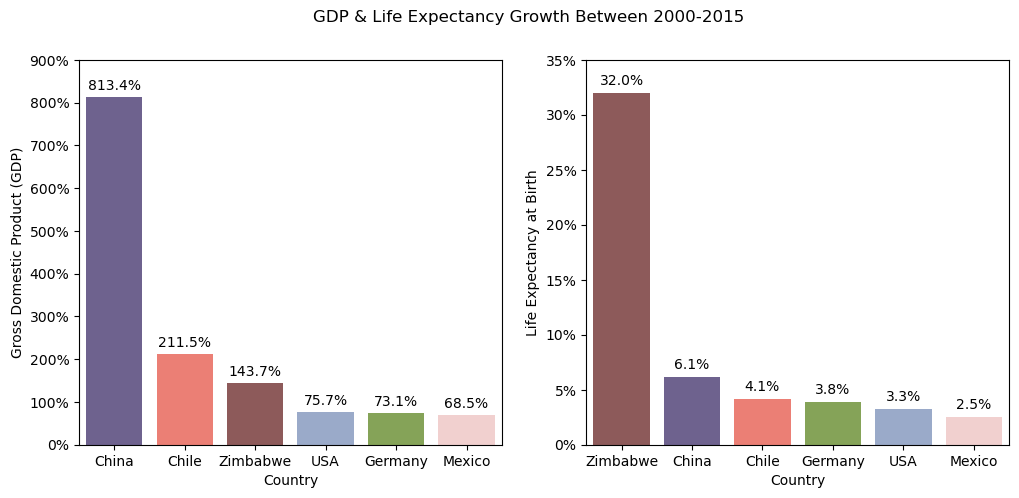

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('GDP & Life Expectancy Growth Between 2000-2015')
# Plot GDP Bar Graph
order = df_growth.sort_values(by="gdp_growth", ascending= False).index.tolist()
sns.barplot(x=df_growth.index,y=df_growth["gdp_growth"],hue=df_growth.index , palette=custom_palette , ax=ax[0] ,order =order)

# Set Y-axis' labels to percentage
ax[0].set_ylabel('Gross Domestic Product (GDP)')
yticks = ax[0].get_yticks()
ylabels = [f'{tick * 100:.0f}%' for tick in yticks]
ax[0].set_yticks(yticks)
ax[0].set_yticklabels(ylabels)

# Include values for each bar
for bar in ax[0].patches:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'{height*100:.1f}%',
        ha='center',
        va='bottom'
    )

# Plot Life Expectancy Bar Graph
order = df_growth.sort_values(by="leb_growth", ascending= False).index.tolist()
ax[1] = sns.barplot(x=df_growth.index,y=df_growth["leb_growth"],hue=df_growth.index , palette=custom_palette ,order =order)
ax[1].set_ylabel('Life Expectancy at Birth')
yticks1 = ax[1].get_yticks()
ylabels1 = [f'{tick * 100:.0f}%' for tick in yticks1]
ax[1].set_yticks(yticks1)
ax[1].set_yticklabels(ylabels1)
# Include values for each bar
for bar in ax[1].patches:
    height = bar.get_height()
    ax[1].text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f'{height*100:.1f}%',
        ha='center',
        va='bottom'
    )
plt.savefig("growth_gdp_life_expectancy_2000_2015.png")

plt.show()